## Задания к уроку 4

### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро)

### Решение:

In [1]:
import numpy as np

In [3]:
while True:
    bid = input("Нажмите Enter для броска. Для выхода введите exit")
    if bid == 'exit':
        break
    else:
        print(int(np.random.uniform(0, 37)))

Нажмите Enter для броска. Для выхода введите exit
1
Нажмите Enter для броска. Для выхода введите exit
34
Нажмите Enter для броска. Для выхода введите exit
4
Нажмите Enter для броска. Для выхода введите exit
13
Нажмите Enter для броска. Для выхода введите exit
16
Нажмите Enter для броска. Для выхода введите exit
16
Нажмите Enter для броска. Для выхода введите exitexit


### 2. 
#### 1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

### Решение:

Рассмотрим два независимых события А и В, где А - выпадение решки, а В - следующее за ним (повторное) выпадение решки. Соответственно событию АВ соответствует два выпадения решки подрядю
Так как события А и В одинаковы, вероятность будем моделировать только для одного события.
Вероятность считаем как количество успехов (n_B, n_AB), деленное на количество экспериментов N.

In [20]:
N = 100000
A = 0
B = 0
n_AB = 0
n_B = 0
for _ in range(N):
    B = int(np.random.uniform(0, 2))
    n_AB += A*B
    n_B += B
    A = B
print(f'P(A) = P(B) = {n_B/N:.02f} P(A)*P(B) = {(n_B/N)**2:.02f} P(AB) = {n_AB/N:.02f}')

P(A) = P(B) = 0.50 P(A)*P(B) = 0.25 P(AB) = 0.25


#### 2) Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9

### Решение:

[1.7084209623447073, 7.0249024144496275, 5.554523074814566, 7.229940406452847, 8.692179825485253, 3.985753619350291, 6.9789685604803475, 1.4547162007532446, 8.116208235202027, 7.717696216211543]


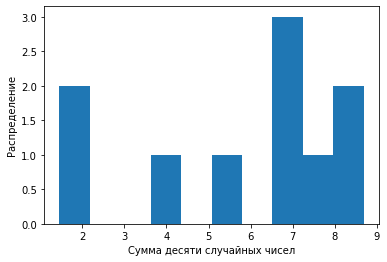

In [36]:
s = []
for i in range(10):
    s.append(np.random.uniform(10))
print(s)
%matplotlib inline
import matplotlib.pyplot as plt
_ = plt.hist(s, 10)
_ = plt.xlabel('Сумма десяти случайных чисел')
_ = plt.ylabel('Распределение')

### 3.
#### 1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

#### 2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

### Решение:

Решим задачу сразу для любых параметров биноминального распределения k и n
NB: k и n в этом случае несут иную смысловую нагрузку, чем в видеоуроке 

In [102]:
n_exp = 10000  # Количество экспериментов при моделировании по методу Монте-Карло
k, n = 5, 10  # Количество ожидаемых успехов n из k испытаний

a = np.zeros((n, n_exp))
positive = 0
for i in range(n):
    a[i] = np.random.randint(0, 2, n_exp)
x = np.sum(a, axis = 0)
for i in range(0, n_exp):
    if x[i] == k:
        positive += 1

fact = np.math.factorial
Ckn = fact(n)/(fact(k)*fact(n - k))
Pnk = Ckn / 2 ** (n)

print(f'Для задачи случайного распределения сочетаний {n} по {k}:')
print(f'Положительных исходов {positive} в {n_exp} экспериментах. Экспериментальная вероятность = {positive/n_exp:.03f}')
print(f'Теоретическая вероятность = {Pnk:.03f}')

Для задачи случайного распределения сочетаний 10 по 5:
Положительных исходов 2352 в 10000 экспериментах. Экспериментальная вероятность = 0.235
Теоретическая вероятность = 0.246


### 4.
#### Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

### Решение:

In [113]:
n = 6  # Количество элементов для перестановок (n <= 9)

Для начала сформируем строку из необходимого количества цифр для перестановок:

In [114]:
s = ''
for i in range(n):
    s += str(i)
print(s)

012345


Теперь сосчитаем количество перестановок, сформированных модулем itertools:

In [115]:
from itertools import permutations as perm
num = 0
for p in perm(s, n):
    print(''.join(str(x) for x in p))
    num += 1

012345
012354
012435
012453
012534
012543
013245
013254
013425
013452
013524
013542
014235
014253
014325
014352
014523
014532
015234
015243
015324
015342
015423
015432
021345
021354
021435
021453
021534
021543
023145
023154
023415
023451
023514
023541
024135
024153
024315
024351
024513
024531
025134
025143
025314
025341
025413
025431
031245
031254
031425
031452
031524
031542
032145
032154
032415
032451
032514
032541
034125
034152
034215
034251
034512
034521
035124
035142
035214
035241
035412
035421
041235
041253
041325
041352
041523
041532
042135
042153
042315
042351
042513
042531
043125
043152
043215
043251
043512
043521
045123
045132
045213
045231
045312
045321
051234
051243
051324
051342
051423
051432
052134
052143
052314
052341
052413
052431
053124
053142
053214
053241
053412
053421
054123
054132
054213
054231
054312
054321
102345
102354
102435
102453
102534
102543
103245
103254
103425
103452
103524
103542
104235
104253
104325
104352
104523
104532
105234
105243
105324
105342
105423

In [116]:
print(f'Фактическое количество перестановок = {num}')
print(f'Расчетное количество перестановок = {fact(n)}')

Фактическое количество перестановок = 720
Расчетное количество перестановок = 720


### 5.
#### Дополните код расчетом коэффициента корреляции x и y по формуле

a = 0.8077196348307544, b = 0.09664940549806726, r = 0.9713648171817364, (np.corrcoef = 0.9713648171817364)


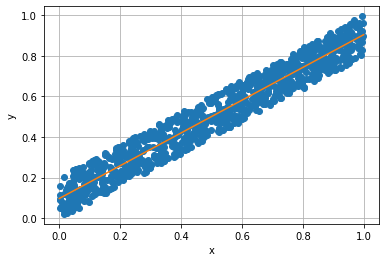

In [131]:
n = 1000
r = 0.8
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n
r = np.sum((x - np.mean(x))*(y - np.mean(y)))/np.sqrt(np.sum((x - np.mean(x))**2) * np.sum((y - np.mean(y))**2))

print(f'a = {a}, b = {b}, r = {r}, (np.corrcoef = {np.corrcoef(x, y)[0, 1]})')
_ = plt.plot([0, 1], [b, a + b])